Instrucciones:

Calcula las siguientes estadísticas descriptivas para las variables numéricas:

Media

Mediana

Desviación estándar

Mínimo

Máximo

1) Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

2) Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

3) Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

4) Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

Bonus:
1) Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

2) Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

3) Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

4) Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
import numpy as np
import warnings

In [3]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [4]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("C:/Users/Usuario/Documents/Adalab49/Módulo 3/pair_mod3_Bea_Male/world_data_full_apply_nulos.csv", index_col=0) 

df.head(10)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa
5,Antigua and Barbuda,223.0,AG,20.5,443.000,0.0,15.33,1.0,"St. John's, Saint John",557.000,113.81,1.2,XCD,1.99,22.3,0.99,1.727759e+09,105.0,24.8,5.0,"St. John's, Saint John",76.9,42.0,3.04,English,24.3,2.76,97.118,NaN,16.5,43.0,NaN,23.800,17.060816,-61.796428,Central America
6,Argentina,17.0,AR,54.3,NaN,105.0,17.02,54.0,Buenos Aires,201.348,232.75,53.5,ARS,2.26,9.8,1.10,4.496634e+11,109.7,90.0,8.8,Buenos Aires,76.5,39.0,3.35,Spanish,17.6,3.96,NaN,61.3,10.1,106.3,9.79,NaN,-38.416097,-63.616672,South America
7,Armenia,104.0,AM,58.9,29.743,49.0,13.99,374.0,Yerevan,5.156,129.18,1.4,AMD,1.76,11.7,0.77,1.367280e+10,92.7,54.6,11.0,Yerevan,74.9,26.0,0.66,Armenian,81.6,4.40,NaN,55.6,20.9,22.6,16.99,NaN,40.069099,45.038189,Asia
8,Australia,3.0,AU,48.2,NaN,58.0,12.60,61.0,Canberra,375.908,119.80,1.6,AUD,1.74,16.3,0.93,1.392681e+12,100.3,113.1,3.1,Sydney,82.7,6.0,13.59,NaN,19.6,3.68,NaN,65.5,23.0,47.4,5.27,NaN,-25.274398,133.775136,Oceania
9,Austria,109.0,AT,32.4,83.871,21.0,9.70,43.0,Vienna,61.448,118.06,1.5,EUR,1.47,46.9,1.20,4.463147e+11,103.1,85.1,2.9,Vienna,81.6,5.0,NaN,German,17.9,5.17,NaN,60.7,25.4,51.4,4.67,NaN,47.516231,14.550072,Europe


Calcula las siguientes estadísticas descriptivas para las variables numéricas:

Media

Mediana

Desviación estándar

Mínimo

Máximo

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.0,1.345045e+02,1.573068e+02,1.265000e+00,2.616850e+01,8.300000e+01,1.655000e+02,8.470000e+02
agricultural_land,188.0,3.911755e+01,2.178305e+01,6.000000e-01,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
land_area,165.0,2.552127e+02,2.583850e+02,0.000000e+00,4.127700e+01,1.484600e+02,4.300000e+02,9.640000e+02
armed_forces_size,166.0,1.037831e+02,1.671580e+02,0.000000e+00,1.025000e+01,2.850000e+01,1.282500e+02,9.360000e+02
birth_rate,189.0,2.021497e+01,9.945774e+00,5.900000e+00,1.130000e+01,1.795000e+01,2.875000e+01,4.608000e+01
calling_code,194.0,3.605464e+02,3.232364e+02,1.000000e+00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
co2-emissions,183.0,1.259155e+02,1.817949e+02,1.016000e+00,7.600000e+00,3.447700e+01,1.850305e+02,7.279730e+02
cpi,175.0,1.441936e+02,5.478400e+01,9.903000e+01,1.136700e+02,1.247400e+02,1.559250e+02,5.509300e+02
cpi_change,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
fertility_rate,188.0,2.698138e+00,1.282267e+00,9.800000e-01,1.705000e+00,2.245000e+00,3.597500e+00,6.910000e+00


In [6]:
#1) Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [7]:
pais_mayor_densidad = df.loc[df["density"].idxmax(),["country","density"]]

In [8]:
print(pais_mayor_densidad)

country    Palestinian National Authority
density                             847.0
Name: 133, dtype: object


In [9]:
pais_menor_poblacion = df.loc[df["population"].idxmin(),["country","population"]]

In [10]:
print(pais_menor_poblacion)

country        Nauru
population    10.084
Name: 120, dtype: object


2) Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [11]:
df["birth_rate"].mean()

20.214973544973546

3) Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [12]:
df["infant_mortality"].describe().T

count    189.000000
mean      21.332804
std       19.548058
min        1.400000
25%        6.000000
50%       14.000000
75%       32.700000
max       84.500000
Name: infant_mortality, dtype: float64

In [13]:
def clasificar_mortalidad_infantil(dato):
    if dato < 14:
        return "baja motarlidad infantil"
    elif 14 <= dato <25:
        return "moderada mortalidad infantil"
    else: 
        "alta mortalidad infantil"

In [14]:
df["infant_mortality"]= df["infant_mortality"].value_counts()

In [15]:
df["infant_mortality"]= df["infant_mortality"].apply(clasificar_mortalidad_infantil)

In [16]:
df["infant_mortality"].value_counts()

infant_mortality
baja motarlidad infantil    17
Name: count, dtype: int64

4) Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [17]:
df_corr = df[["fertility_rate","life_expectancy"]].corr()

In [18]:
df_corr.iloc[0,1]

-0.8491528107360012

<Axes: xlabel='fertility_rate', ylabel='life_expectancy'>

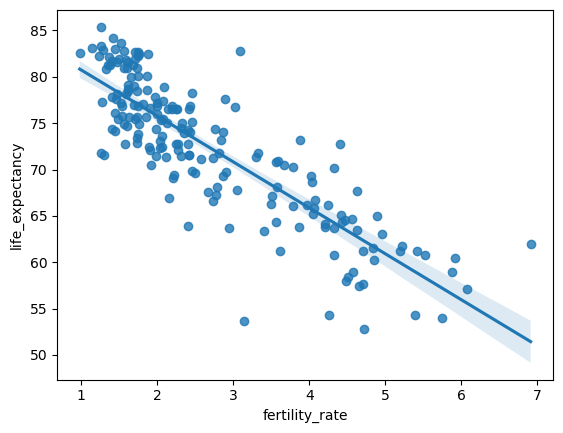

In [19]:
sns.regplot(x= "fertility_rate", y= "life_expectancy", data= df)

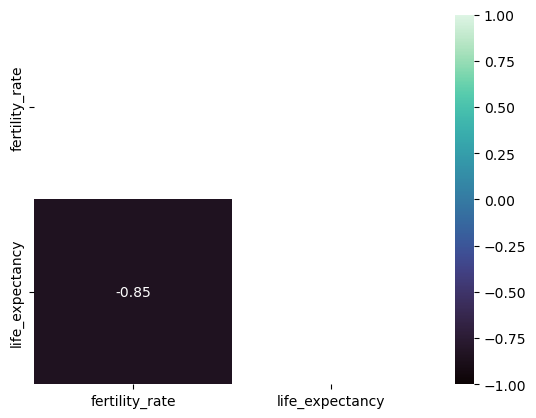

In [21]:
#plt.figure(figsize = (15, 15))
# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_corr, dtype=bool))
# creamos un heatmap con la máscara
sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask);